In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [7]:
df = pd.read_csv('../../EDA/data/train.csv', usecols=['Age', 'Fare', 'Survived'])

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.dropna(inplace=True)

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [16]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6223776223776224

In [17]:
cross_val_score(clf, X, y, scoring='accuracy', cv=10).mean()

np.float64(0.6316901408450704)

In [18]:
k_bin_age = KBinsDiscretizer(n_bins=5, strategy='quantile', encode='ordinal')
k_bin_fare = KBinsDiscretizer(n_bins=5, strategy='quantile', encode='ordinal')

In [19]:
trf = ColumnTransformer([
    ('bin_age', k_bin_age, ['Age']),
    ('bin_fare', k_bin_fare, ['Fare'])

], remainder='passthrough')

In [20]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)


d:\Learn-ML-ai\venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
d:\Learn-ML-ai\venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [23]:
trf.named_transformers_['bin_age'].bin_edges_

array([array([ 0.42, 19.  , 25.  , 32.  , 42.  , 80.  ])], dtype=object)

In [24]:
trf.named_transformers_['bin_age'].n_bins_

array([5])

In [28]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf': X_train_trf[:, 0],
    'fare': X_train['Fare'],
    'fare_trf': X_train_trf[:, 1]}
)  

In [29]:
output['age_label'] = pd.cut(x=X_train['Age'],
                             bins=trf.named_transformers_['bin_age'].bin_edges_[0].tolist()
)
output['fare_label'] = pd.cut(x=X_train['Fare'],
                             bins=trf.named_transformers_['bin_fare'].bin_edges_[0].tolist()
)

In [30]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_label,fare_label
550,17.0,0.0,110.8833,4.0,"(0.42, 19.0]","(51.479, 512.329]"
634,9.0,0.0,27.9000,3.0,"(0.42, 19.0]","(26.0, 51.479]"
762,20.0,1.0,7.2292,0.0,"(19.0, 25.0]","(0.0, 7.896]"
847,35.0,3.0,7.8958,1.0,"(32.0, 42.0]","(0.0, 7.896]"
813,6.0,0.0,31.2750,3.0,"(0.42, 19.0]","(26.0, 51.479]"


In [32]:
clf= DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred = clf.predict(X_test_trf)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.6433566433566433

In [33]:
X_trf = trf.fit_transform(X)
cross_val_score(clf, X_trf, y, scoring='accuracy', cv=10).mean()

d:\Learn-ML-ai\venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
d:\Learn-ML-ai\venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


np.float64(0.673943661971831)

d:\Learn-ML-ai\venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
d:\Learn-ML-ai\venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


0.673943661971831


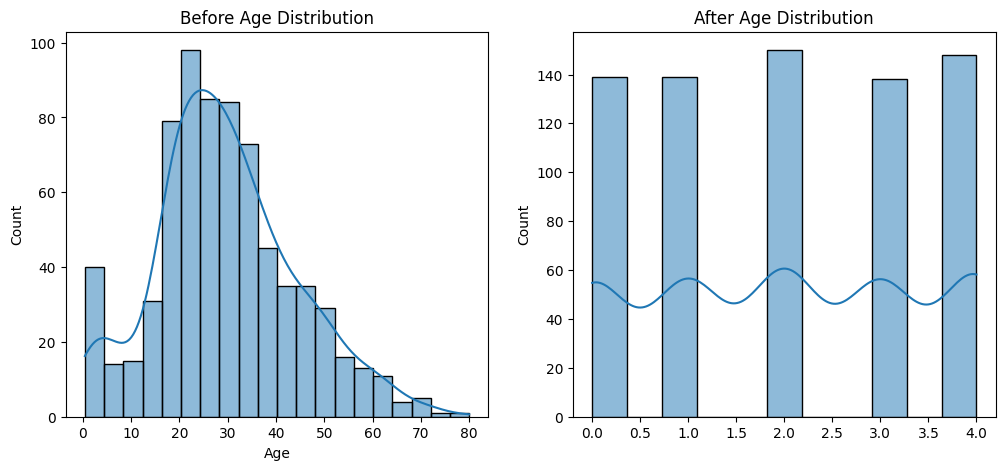

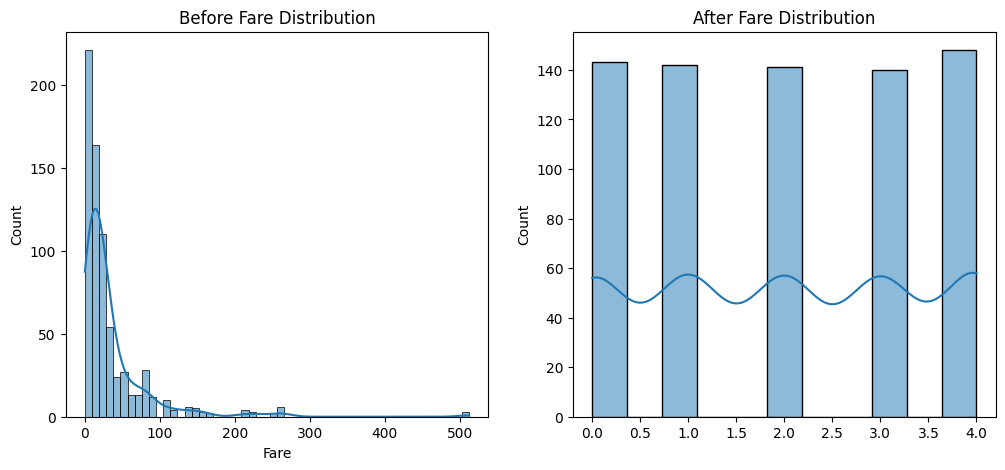

In [37]:
def discretize(X, y, bins, strategy, code):
    kbin_age = KBinsDiscretizer(n_bins=bins, strategy=strategy, encode=code)
    k_bin_fare = KBinsDiscretizer(n_bins=bins, strategy=strategy, encode=code)

    trf = ColumnTransformer([
        ('bin_age', kbin_age, ['Age']),
        ('bin_fare', k_bin_fare, ['Fare'])
    ], remainder='passthrough')

    X_trf = trf.fit_transform(X)
    clf = DecisionTreeClassifier()
    print(cross_val_score(clf, X_trf, y, scoring='accuracy', cv=10).mean())

    plt.figure(figsize=(12, 5))
    ax1 = plt.subplot(1,2,1)
    sns.histplot(X['Age'], kde=True, ax=ax1)
    ax1.set_title('Before Age Distribution')

    ax2 = plt.subplot(1,2,2)
    sns.histplot(X_trf[:, 0], kde=True, ax=ax2)
    ax2.set_title('After Age Distribution')

    plt.show()


    plt.figure(figsize=(12, 5))
    ax1 = plt.subplot(1,2,1)
    sns.histplot(X['Fare'], kde=True, ax=ax1)
    ax1.set_title('Before Fare Distribution')
    ax2 = plt.subplot(1,2,2)
    sns.histplot(X_trf[:, 1], kde=True, ax=ax2)
    ax2.set_title('After Fare Distribution')
    plt.show()

discretize(X, y, bins=5, strategy='quantile', code='ordinal')

